Question 1<br>
Install Pipenv<br>
What's the version of pipenv you installed?<br>
Use --version to find out

In [5]:
!pip install pipenv

     ---------------------------------------- 3.2/3.2 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 807.9/807.9 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 468.9/468.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.0.0
    Uninstalling platformdirs-3.0.0:
      Successfully uninstalled platformdirs-3.0.0



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
! pipenv --version

pipenv, version 2023.10.3


Question 2<br>
- Use Pipenv to install Scikit-Learn version 1.3.1<br>
- What's the first hash for scikit-learn you get in Pipfile.lock?

In [9]:
# current directory:
import os
print(os.getcwd())

g:\mlzoom_camp\2023


"sha256:0c275a06c5190c5ce00af0acbb61c06374087949f643ef32d355ece12c4db043"


Q3:<br>
- Let's use these models!<br>
- Write a script for loading these models with pickle<br>
- Score this client:

In [13]:
import os
# G:\mlzoom_camp\2023\home
os.chdir(r'G:\mlzoom_camp\2023\home')

In [21]:
PREFIX="https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework"
!curl -o model1.bin $PREFIX/model1.bin
!curl -o dv.bin $PREFIX/dv.bin



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   842  100   842    0     0   1410      0 --:--:-- --:--:-- --:--:--  1412
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   560  100   560    0     0    940      0 --:--:-- --:--:-- --:--:--   941


In [14]:
# output_file='model1.bin'
#  load model with pickle
import pickle
# out_file = 'model1.bin'
model=pickle.load(open('model1.bin','rb'))
dv=pickle.load(open('dv.bin','rb'))
output_file='model_1.bin'
# # load model and dv from files:
# with open(model_file, 'rb') as f_in:
#     model = pickle.load(f_in)
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DictVectorizer from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
# load model:
import pickle
import pandas as pd
with open('model_1.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [ ]:
# score client {"job": "retired", "duration": 445, "poutcome": "success"}
# dv = pickle.load(open(dv_file, 'rb'))
# dv.transform({"job": "retired", "duration": 445, "poutcome": "success"})
# dv.transform({"job": "retired", "duration": 445, "poutcome": "success"}).toarray()
# dv.transform({"job": "retired", "duration": 445, "poutcome": "success"}).toarray().shape
# dv.transform({"job": "retired", "duration": 445, "poutcome": "success"}).toarray().reshape(1, -1)


In [16]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression())

In [17]:
client={"job": "retired", "duration": 445, "poutcome": "success"}

In [18]:
X = dv.transform(client)

In [19]:
X

array([[445.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.]])

In [20]:
model.predict_proba(X)[0,1]

0.9019309332297606

Question 4<br>

Now let's serve this model as a web service

Install Flask and gunicorn (or waitress, if you're on Windows)
Write Flask code for serving the model
Now score this client using requests:

In [32]:
os.getcwd()

'G:\\mlzoom_camp\\2023\\home'

In [23]:
client={"job": "unknown", "duration": 270, "poutcome": "failure"}



In [24]:
import requests
url = 'http://localhost:9696/predict'
response=requests.post(url, json=client)
response.json()


{'probability': '0.13968947052356817'}

Question 5<br>
- Download the base image svizor/zoomcamp-model:3.10.12-slim. You can easily make it by using docker pull command.

- So what's the size of this base image?

47 MB
147 MB
374 MB
574 MB
You can get this information when running docker images - it'll be in the "SIZE" column.


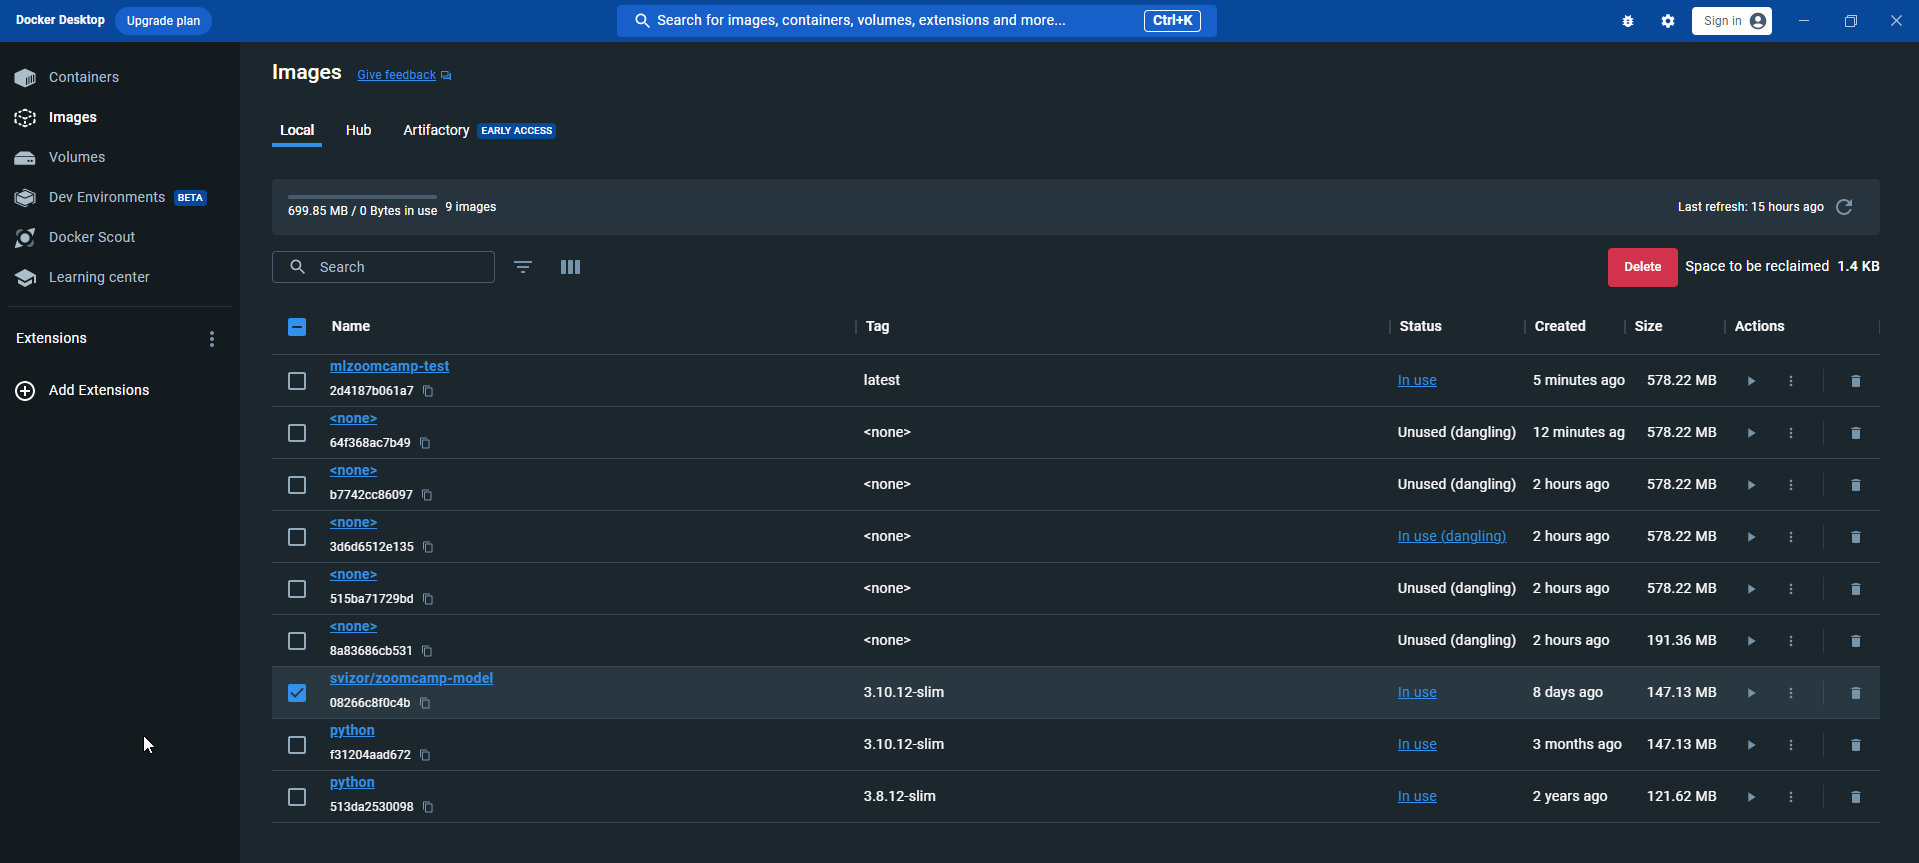